In [34]:
import csv
import datetime
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
import IPython.display

plt.rcParams['font.family'] = ["D2Coding"]

In [59]:
data = {}

for fname in glob.glob("dataset/covid19/csse_covid_19_daily_reports/*.csv"):
    _date = datetime.datetime.strptime(os.path.splitext(os.path.basename(fname))[0], "%m-%d-%Y")
    with open(fname, "r", encoding='utf-8') as f:
        _csv = csv.DictReader(f)
        if "Country_Region" in _csv.fieldnames:
            for row in _csv:
                if row["Country_Region"] in ["Korea, South", "South Korea", "Republic of Korea"]:
                    data[_date] = int(row["Confirmed"])
                    break
        elif "Country/Region" in _csv.fieldnames:
            for row in _csv:
                if row["Country/Region"] in ["South Korea", "Korea, South", "Republic of Korea"]:
                    data[_date] = int(row["Confirmed"])
                    break


kospi_dict = {}
kosdaq_dict = {}

with open("dataset/covid19/주식시장.csv", "r", encoding='utf-8') as f:
    _csv = csv.DictReader(f)
    for i, row in enumerate(_csv):
        if i == 0:
            temp_ksp = row
        elif i == 7:
            temp_kdq = row

for i, k in list(temp_ksp.items())[1:]:
    dtm = datetime.datetime.strptime(i, "%Y. %m. %d")
    kospi_dict[dtm] = float(k)

for i, k in list(temp_kdq.items())[1:]:
    dtm = datetime.datetime.strptime(i, "%Y. %m. %d")
    kosdaq_dict[dtm] = float(k)


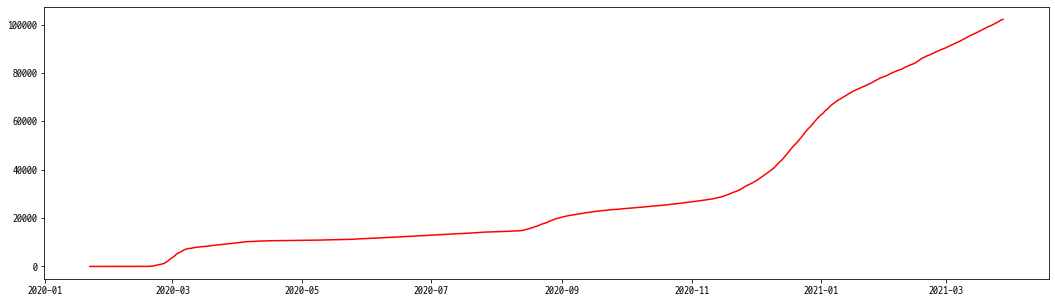

In [60]:
date_data = list(data.items())
date_data.sort()

plt.figure(figsize=(18,5))
#plt.plot([i[0] for i in date_data], [i[1] for i in date_data])

plt.plot([i[0] for i in date_data], [i[1] for i in date_data], "red")

plt.show()

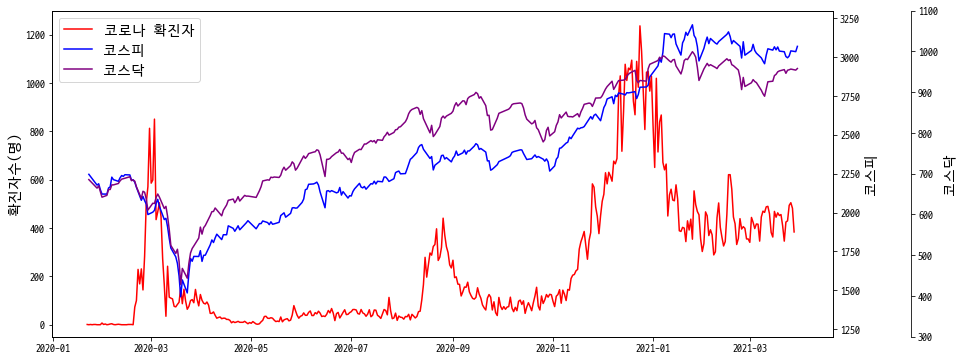

In [109]:
kospi_data = list(kospi_dict.items())
kospi_data.sort()
kosdaq_data = list(kosdaq_dict.items())
kosdaq_data.sort()

temp_data = [0] + [i[1] for i in date_data]

fig, ax = plt.subplots(figsize=(14, 6))

ax2 = ax.twinx()
ax3 = ax.twinx()
ax3.spines["right"].set_position(("axes", 1.1))

p_covid, = ax.plot([i[0] for i in date_data], [j-i for i, j in zip(temp_data, temp_data[1:])], "red", label="코로나 확진자")
ax.set_ylim((-50, 1300))
ax.set_ylabel("확진자수(명)", fontsize=14)

p_kospi, = ax2.plot([kd[0] for kd in kospi_data], [kd[1] for kd in kospi_data], "blue", label="코스피")
ax2.set_ylim((1200, 3300))
ax2.set_ylabel("코스피", fontsize=14)

p_kosdaq, = ax3.plot([kd[0] for kd in kosdaq_data], [kd[1] for kd in kosdaq_data], "purple", label="코스닥")
ax3.set_ylim((300, 1100))
ax3.set_ylabel("코스닥", fontsize=14)

ax.legend(handles=[p_covid, p_kospi, p_kosdaq], loc=2, fontsize=14)

plt.show()